# 생활인구(2021) 전처리 -> 행정동별 월별 생활인구

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

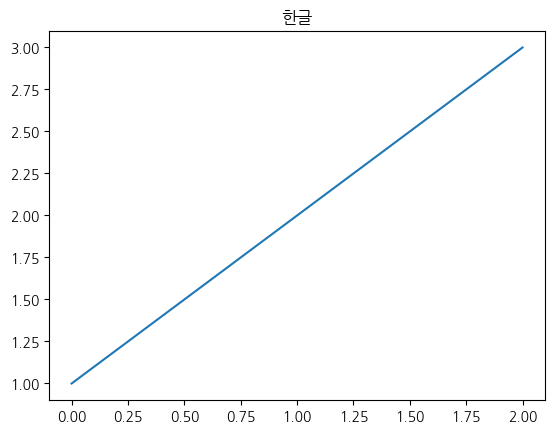

In [2]:
import matplotlib.pyplot as plt
plt.rc("font", family="NanumGothic") # 라이브러리 불러오기와 함께 한번만 실행

plt.plot([1, 2, 3])
plt.title("한글")
plt.show()

In [3]:
df = pd.read_csv('./전처리데이터/2021_행정동별_월별_생활인구.csv')

In [4]:
df.head(3)

,년도,월,행정동코드,총생활인구수,연령대0,연령대10,연령대20,연령대30,연령대40,연령대50,연령대60,연령대70이상
0,2021,1,11110515,1.130741e+07,759050.1790,1.040200e+06,1.613469e+06,1.744509e+06,2.094554e+06,1.697057e+06,1.062396e+06,1.296178e+06
1,2021,1,11110530,1.617764e+07,614087.3820,7.587889e+05,2.212104e+06,3.451205e+06,3.369730e+06,2.550062e+06,1.558387e+06,1.663276e+06
2,2021,1,11110540,3.967976e+06,120990.2029,2.067458e+05,7.388069e+05,7.314860e+05,7.457306e+05,6.103049e+05,4.379130e+05,3.759987e+05


## 행정동 월별 생활인구

In [5]:
df['행정동코드'].nunique()
# 전체 행정동 개수는 424

424

In [6]:
# 월 / 행정동별 총 생활인구수 분포 확인
df2 = df.groupby(['행정동코드', '월'])['총생활인구수'].sum().reset_index()
df2.head(5)

,행정동코드,월,총생활인구수
0,11110515,1,1.130741e+07
1,11110515,2,1.047923e+07
2,11110515,3,1.224058e+07
3,11110515,4,1.190048e+07
4,11110515,5,1.205034e+07


In [7]:
dong_codes = df2['행정동코드'].unique().tolist()

In [11]:
#행정동코드 > 총 생활인구수 / 12 (월평균 총 생활인구수) > 연령대별 월별 생활인구수 / 12(월평균 연령대별 생활인구수)
df3 = (df.groupby(['년도', '행정동코드'])['총생활인구수', '연령대0', '연령대10', '연령대20', '연령대30',
       '연령대40', '연령대50', '연령대60', '연령대70이상'].sum() / 12).reset_index()

df3 = df3.rename(columns = {'총생활인구수':'월평균_총생활인구수', '연령대0':'연령대0_평균', '연령대10':'연령대10_평균', '연령대20':'연령대20_평균', '연령대30':'연령대30_평균', '연령대40':'연령대40_평균',
                     '연령대50':'연령대50_평균', '연령대60':'연령대60_평균', '연령대70이상':'연령대70이상_평균'})

df3

,년도,행정동코드,월평균_총생활인구수,연령대0_평균,연령대10_평균,연령대20_평균,연령대30_평균,연령대40_평균,연령대50_평균,연령대60_평균,연령대70이상_평균
0,2021,11110515,1.209917e+07,8.375791e+05,1.248469e+06,1.751869e+06,1.844913e+06,2.203568e+06,1.786821e+06,1.084626e+06,1.341327e+06
1,2021,11110530,1.676311e+07,5.677455e+05,7.856370e+05,2.477195e+06,3.636744e+06,3.529510e+06,2.634325e+06,1.563019e+06,1.568931e+06
2,2021,11110540,4.049699e+06,1.134489e+05,2.930303e+05,7.477066e+05,7.416656e+05,7.378242e+05,6.190285e+05,4.264555e+05,3.705398e+05
3,2021,11110550,1.083304e+07,5.988879e+05,1.165716e+06,1.313121e+06,1.337209e+06,1.821755e+06,1.739128e+06,1.354906e+06,1.502316e+06
4,2021,11110560,1.385978e+07,9.131507e+05,1.451723e+06,1.488734e+06,1.545000e+06,2.170841e+06,2.356430e+06,1.929810e+06,2.004093e+06
...,...,...,...,...,...,...,...,...,...,...,...
419,2021,11740650,1.895730e+07,1.216728e+06,1.177383e+06,2.630787e+06,3.304315e+06,3.004693e+06,2.914698e+06,2.443452e+06,2.265244e+06
420,2021,11740660,1.970084e+07,1.123877e+06,1.706742e+06,2.730697e+06,3.081562e+06,3.327176e+06,3.228396e+06,2.396453e+06,2.105940e+06
421,2021,11740685,3.803010e+07,2.683010e+06,2.869666e+06,4.933785e+06,5.881049e+06,5.904745e+06,6.012851e+06,5.144924e+06,4.600066e+06
422,2021,11740690,4.581732e+06,3.518027e+05,6.325135e+05,4.425409e+05,5.925207e+05,7.371687e+05,7.379338e+05,5.568980e+05,5.303539e+05


In [106]:
df3.to_csv('2021_행정동별_월별_생활인구_평균.csv', index = False)